# EDA -1  Bike Details Dataset

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("BIKE DETAILS.csv")

In [8]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [66]:
df.shape

(1061, 7)

In [68]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [70]:
df.dtypes

name                  object
selling_price          int64
year                   int64
seller_type           object
owner                 object
km_driven              int64
ex_showroom_price    float64
dtype: object

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  1061 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [10]:
df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [18]:
df.fillna(0,inplace=True)

In [20]:
df.isnull().sum()

name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64

## 1 : What is the range of selling prices in the dataset?

In [26]:

selling_price_min = df.selling_price.min()
selling_price_max = df.selling_price.max()
print(f"Range of Selling Prices: ₹{selling_price_min} to ₹{selling_price_max}")

Range of Selling Prices: ₹5000 to ₹760000


## 2 :  What is the median selling price for bikes in the dataset?

In [31]:
df.selling_price.median()

45000.0

## 3 : What is the most common seller type?

In [47]:
df["seller_type"].mode()

0    Individual
Name: seller_type, dtype: object

## 4 : How many bikes have driven more than 50,000 kilometers?

In [50]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [78]:
bikes_over_50k_km = (df['km_driven'] > 50000).sum()

print(f"Bikes Driven More Than 50,000 Kilometers: {bikes_over_50k_km} bikes")

Bikes Driven More Than 50,000 Kilometers: 170 bikes


## 5 : What is the average km_driven value for each ownership type?

In [87]:
df.owner.unique()

array(['1st owner', '2nd owner', '3rd owner', '4th owner'], dtype=object)

In [83]:
df["km_driven"].groupby(df["owner"]).mean()

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64

## 6 : What proportion of bikes are from the year 2015 or older?

In [90]:

bikes_2015_or_older = (df['year'] <= 2015).sum()
total_bikes = len(df)
proportion_2015_or_older = bikes_2015_or_older / total_bikes * 100

print(f"Proportion of Bikes from 2015 or Older: {proportion_2015_or_older:.1f}%")


Proportion of Bikes from 2015 or Older: 56.6%


## 7 : What is the trend of missing values across the dataset?

In [93]:
df.fillna(0,inplace=True)

In [95]:
df.isnull().sum()

name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64

## 8 : What is the highest ex_showroom_price recorded, and for which bike?

In [118]:


highest_ex_showroom = df[df['ex_showroom_price'] == df['ex_showroom_price'].max()]

print(highest_ex_showroom[['name', 'ex_showroom_price']])


                           name  ex_showroom_price
134  Harley-Davidson Street Bob          1278000.0


## 9 : What is the total number of bikes listed by each seller type? 

In [121]:
df["name"].groupby(df["seller_type"]).count()

seller_type
Dealer           6
Individual    1055
Name: name, dtype: int64

## 10 : What is the relationship between selling_price and km_driven for first-owner bikes?

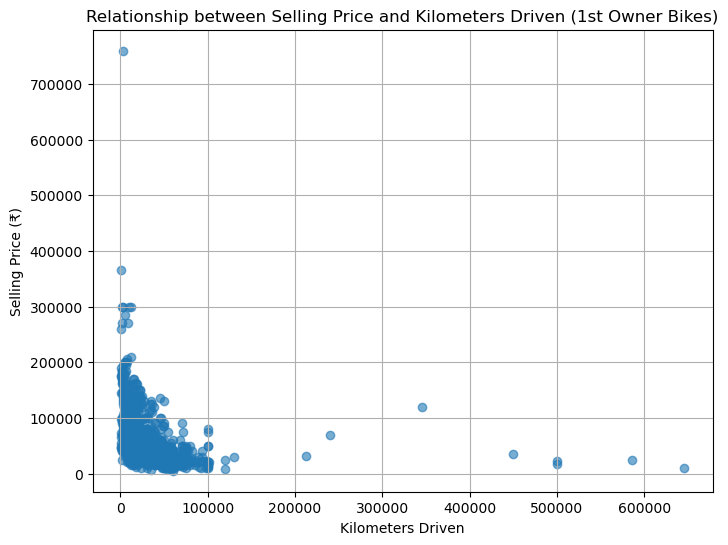

In [126]:


# Filter the data for first-owner bikes
first_owner_bikes = df[df['owner'] == '1st owner']

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(first_owner_bikes['km_driven'], first_owner_bikes['selling_price'], alpha=0.6)
plt.title('Relationship between Selling Price and Kilometers Driven (1st Owner Bikes)')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price (₹)')
plt.grid(True)
plt.show()


## 11: Identify and remove outliers in the km_driven column using the IQR methodD

In [131]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to exclude outliers
bike_data_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# Display the number of entries before and after removing outliers
print(f"Original dataset size: {len(df)}")
print(f"Dataset size after removing outliers: {len(bike_data_no_outliers)}")


Original dataset size: 1061
Dataset size after removing outliers: 1022


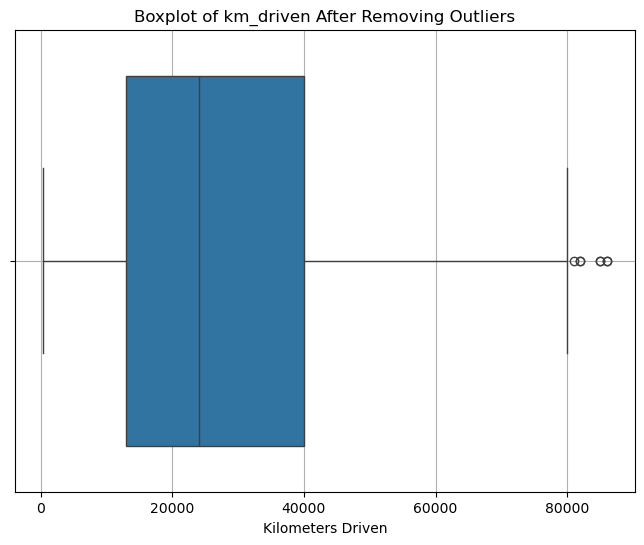

In [141]:



plt.figure(figsize=(8, 6))
sns.boxplot(data=bike_data_no_outliers, x='km_driven')
plt.title('Boxplot of km_driven After Removing Outliers')
plt.xlabel('Kilometers Driven')
plt.grid(True)
plt.show()


## 12 : Perform a bivariate analysis to visualize the relationship between year and selling_priceD

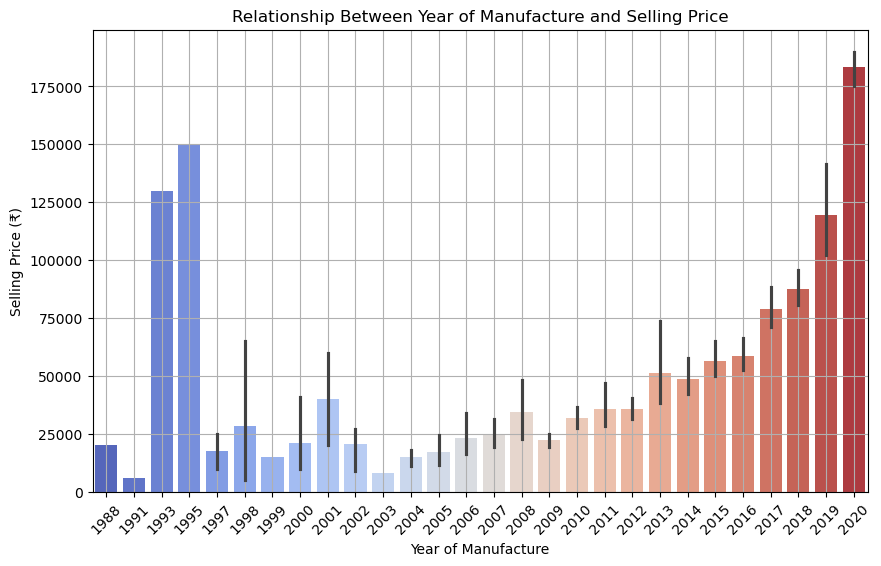

In [146]:

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='year', y='selling_price', palette='coolwarm')
plt.title('Relationship Between Year of Manufacture and Selling Price')
plt.xlabel('Year of Manufacture')
plt.ylabel('Selling Price (₹)')
plt.xticks(rotation=45)  # Rotate the year labels for better readability
plt.grid(True)
plt.show()


## 13 : What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?

In [149]:
# Calculate the age of the bike (current year - manufacturing year)
current_year = 2024
df['age'] = current_year - df['year']

# Calculate the average selling price for each age
average_depreciation = df.groupby('age')['selling_price'].mean().reset_index()

# Display the average depreciation for each age
print(average_depreciation)


    age  selling_price
0     4  183333.333333
1     5  119689.511628
2     6   87660.374046
3     7   78894.736842
4     8   58469.018692
5     9   56500.000000
6    10   48668.131868
7    11   51136.986301
8    12   35748.400000
9    13   35655.721311
10   14   31793.333333
11   15   22267.857143
12   16   34289.285714
13   17   24927.586207
14   18   23380.000000
15   19   16978.571429
16   20   15100.000000
17   21    8000.000000
18   22   20666.666667
19   23   40000.000000
20   24   20833.333333
21   25   15000.000000
22   26   28333.333333
23   27   17500.000000
24   29  150000.000000
25   31  130000.000000
26   33    6000.000000
27   36   20000.000000


## 14 : Which bike names are priced significantly above the average price for their manufacturing year?

In [152]:
# Calculate the average selling price for each manufacturing year
avg_price_by_year = df.groupby('year')['selling_price'].mean().reset_index()

# Merge this average price back with the original dataset to compare each bike's selling price
df = df.merge(avg_price_by_year, on='year', suffixes=('', '_avg'))

# Define a threshold (e.g., 20% above the average price)
threshold = 1.2

# Find bikes priced significantly above the average
significantly_above_avg = df[df['selling_price'] > df['selling_price_avg'] * threshold]

# Display the bike names and their prices
significantly_above_avg[['name', 'year', 'selling_price', 'selling_price_avg']]


,name,year,selling_price,selling_price_avg
0,Royal Enfield Classic 350,2019,175000,119689.511628
2,Royal Enfield Classic Gunmetal Grey,2018,150000,87660.374046
7,Royal Enfield Bullet 350 [2007-2011],2008,180000,34289.285714
13,Yamaha YZF R3,2019,365000,119689.511628
17,Yamaha YZF R15 S,2010,40000,31793.333333
...,...,...,...,...
984,Royal Enfield Classic 500,2014,95000,48668.131868
985,Royal Enfield Classic 500,2011,90000,35655.721311
1005,TVS Apache RTR 160,2014,60000,48668.131868
1008,Bajaj Pulsar 220 F,2012,52000,35748.400000


## 15 :  Develop a correlation matrix for numeric columns and visualize it using a heatmap.

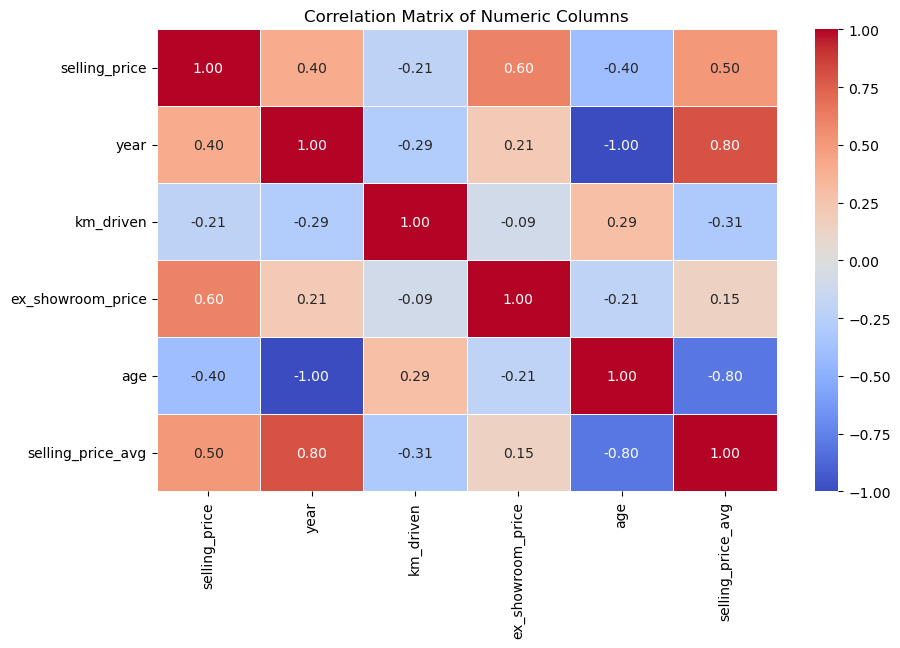

In [155]:

numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Columns')
plt.show()


# EDA -2 Car Sale Dataset

In [158]:
dff = pd.read_csv("Car Sale.csv")

In [160]:
dff

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


In [162]:
dff.shape

(23906, 16)

In [166]:
dff.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [168]:
dff.isnull().sum()

Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

## 1 :  What is the average selling price of cars for each dealer, and how does it compare across different dealers?

In [175]:
dff.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)

Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                                 28095.562050
Pars Auto Sales             

## 2:Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?

In [188]:
dff.groupby('Company')['Price ($)'].std().sort_values(ascending=False)

Company
Lincoln       19658.050211
Saab          19653.740089
Cadillac      19517.120220
Plymouth      19065.997338
Lexus         17852.923492
Buick         17142.232626
Mercury       16445.172195
Nissan        16214.264017
Saturn        15990.223671
Ford          15849.090227
Mercedes-B    15722.807459
Oldsmobile    15711.345857
Toyota        15367.131714
BMW           15065.578723
Pontiac       14348.963592
Infiniti      13696.332844
Chevrolet     13311.063223
Volvo         12933.790185
Subaru        12920.771620
Audi          12904.243867
Volkswagen    12527.124011
Mitsubishi    11671.343035
Chrysler      11583.286811
Dodge         11187.592085
Honda         11148.629062
Jaguar        10222.531533
Jeep           9459.834418
Acura          8183.046414
Porsche        5261.839206
Hyundai        3485.982649
Name: Price ($), dtype: float64

## 3 : what is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?

In [193]:
dff.groupby('Transmission')['Price ($)'].describe()

,count,mean,std,min,25%,50%,75%,max
Transmission,,,,,,,,
Auto,12571.0,28248.525972,13747.070597,1200.0,19000.0,24000.0,35500.0,75700.0
Manual,11335.0,27914.710631,15862.871978,1700.0,17000.0,22001.0,34000.0,85800.0


In [199]:
dff.groupby('Transmission')['Price ($)'].quantile(0.75) - dff.groupby('Transmission')['Price ($)'].quantile(0.25)

Transmission
Auto      16500.0
Manual    17000.0
Name: Price ($), dtype: float64

## 4 : What is the distribution of car prices across different regions?

In [204]:
dff.groupby('Dealer_Region')['Price ($)'].describe()

,count,mean,std,min,25%,50%,75%,max
Dealer_Region,,,,,,,,
Aurora,3130.0,28334.626837,15026.207252,9000.0,18001.0,23000.0,35000.0,85800.0
Austin,4135.0,28341.603628,14903.884549,9000.0,18001.0,23801.0,35001.0,85601.0
Greenville,3128.0,28180.819054,15101.538328,1200.0,18001.0,22500.0,34500.0,85200.0
Janesville,3821.0,27833.350955,14344.995638,4300.0,18001.0,23000.0,34000.0,85400.0
Middletown,3128.0,27856.338875,14619.842395,1700.0,18000.0,22750.0,34000.0,85300.0
Pasco,3131.0,28119.039923,14659.315941,9000.0,18500.5,23000.0,34000.0,85600.0
Scottsdale,3433.0,27954.958928,14902.916820,1450.0,18000.0,22600.0,33500.0,85001.0


In [209]:
dff.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

## 5 : What is the distribution of cars based on body styles?

In [211]:
dff.groupby('Body Style')['Price ($)'].describe()

,count,mean,std,min,25%,50%,75%,max
Body Style,,,,,,,,
Hardtop,2971.0,29151.096600,14070.057753,11000.0,19001.0,24000.0,39000.0,82500.0
Hatchback,6128.0,27127.035574,14659.696568,1700.0,18000.0,22000.0,31001.0,85600.0
Passenger,3945.0,28942.031686,16338.856359,9000.0,18000.0,24000.0,37000.0,85800.0
SUV,6374.0,26767.673204,14014.210149,1200.0,18000.0,22350.0,31000.0,85500.0
Sedan,4488.0,29832.802807,14795.682187,11000.0,19000.0,25000.0,39500.0,69980.0


## 6 : How does the average selling price of cars vary by customer gender and annual income?

In [214]:
dff.groupby(['Gender', 'Annual Income'])['Price ($)'].mean()


Gender  Annual Income
Female  13500            28132.038732
        106000           46001.000000
        121000           20000.000000
        190000           19001.000000
        211000           51000.000000
                             ...     
Male    6600000          39000.000000
        6800000          15000.000000
        7650000          21000.000000
        8000000          85000.000000
        11200000         26001.000000
Name: Price ($), Length: 3442, dtype: float64

## 7 : What is the distribution of car prices by region, and how does the number of cars sold vary by region?

In [217]:
dff.groupby('Dealer_Region')['Price ($)'].describe()


,count,mean,std,min,25%,50%,75%,max
Dealer_Region,,,,,,,,
Aurora,3130.0,28334.626837,15026.207252,9000.0,18001.0,23000.0,35000.0,85800.0
Austin,4135.0,28341.603628,14903.884549,9000.0,18001.0,23801.0,35001.0,85601.0
Greenville,3128.0,28180.819054,15101.538328,1200.0,18001.0,22500.0,34500.0,85200.0
Janesville,3821.0,27833.350955,14344.995638,4300.0,18001.0,23000.0,34000.0,85400.0
Middletown,3128.0,27856.338875,14619.842395,1700.0,18000.0,22750.0,34000.0,85300.0
Pasco,3131.0,28119.039923,14659.315941,9000.0,18500.5,23000.0,34000.0,85600.0
Scottsdale,3433.0,27954.958928,14902.916820,1450.0,18000.0,22600.0,33500.0,85001.0


In [219]:
dff.groupby('Dealer_Region')['Price ($)'].count()


Dealer_Region
Aurora        3130
Austin        4135
Greenville    3128
Janesville    3821
Middletown    3128
Pasco         3131
Scottsdale    3433
Name: Price ($), dtype: int64

## 8 : How does the average car price differ between cars with different engine sizes?

In [222]:
dff.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [224]:
dff.groupby('Engine')['Price ($)'].mean()

Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64

## 9 : How do car prices vary based on the customer’s annual income bracket?

In [231]:
dff.groupby('Annual Income')['Price ($)'].mean()

Annual Income
10080       22801.000000
13500       27878.981415
24000       61001.000000
85000       43000.000000
106000      46001.000000
                ...     
6600000     39000.000000
6800000     15000.000000
7650000     21000.000000
8000000     85000.000000
11200000    26001.000000
Name: Price ($), Length: 2508, dtype: float64

## 10 : What are the top 5 car models with the highest number of sales, and how does their price distribution look?

In [235]:
dff.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [241]:
price = dff.groupby('Model')['Price ($)'].count().sort_values(ascending=False).head(5)



In [243]:
price

Model
Diamante      418
Silhouette    411
Prizm         411
Passat        391
Ram Pickup    383
Name: Price ($), dtype: int64

In [245]:
price.describe()


count      5.00000
mean     402.80000
std       14.97331
min      383.00000
25%      391.00000
50%      411.00000
75%      411.00000
max      418.00000
Name: Price ($), dtype: float64

## 11 : How does car price vary with engine size across different car colors, and which colors have the highest price variation?


In [251]:
dff.groupby(['Color', 'Engine'])['Price ($)'].mean()


Color       Engine                   
Black       DoubleÂ Overhead Camshaft    25766.451103
            Overhead Camshaft            31732.967164
Pale White  DoubleÂ Overhead Camshaft    30347.987460
            Overhead Camshaft            24327.767694
Red         DoubleÂ Overhead Camshaft    27434.392314
            Overhead Camshaft            30153.405229
Name: Price ($), dtype: float64

In [253]:
dff.groupby('Color')['Price ($)'].std().sort_values(ascending=False)

Color
Red           15519.360962
Black         15286.065976
Pale White    14077.346859
Name: Price ($), dtype: float64

## 12 : Is there any seasonal trend in car sales based on the date of sale?

In [258]:
dff.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [264]:
dff["Date"] = pd.to_datetime(dff["Date"])

In [266]:
dff.groupby(dff['Date'].dt.month)['Price ($)'].mean()

Date
1     27463.567089
2     28087.000000
3     27169.949837
4     28316.878550
5     28085.088654
6     28283.324781
7     27929.293913
8     28617.969501
9     28331.370045
10    28434.571038
11    27948.034006
12    27993.812465
Name: Price ($), dtype: float64

<Axes: xlabel='Date'>

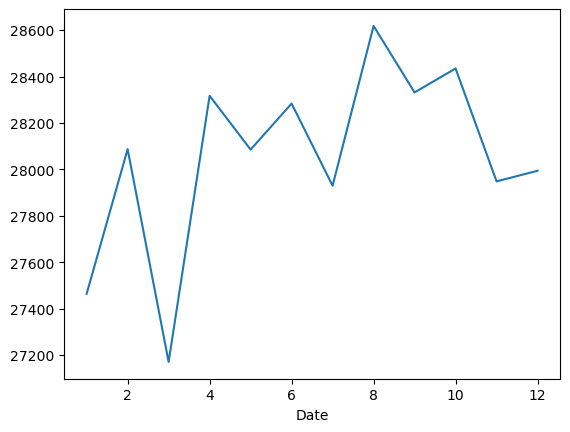

In [268]:
dff.groupby(dff['Date'].dt.month)['Price ($)'].mean().plot()

### insights  --> there is no seasonal trend in car sales based on the date of sale.


## 13 : How does the car price distribution change when considering different combinations of body style and transmission type?

In [272]:
dff.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

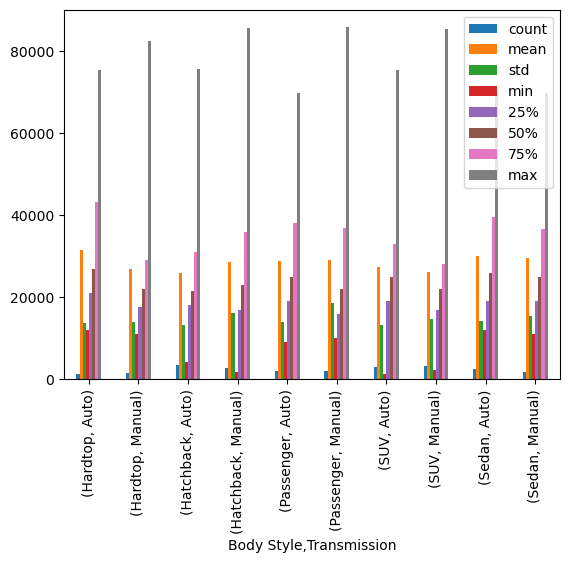

In [276]:
dff.groupby(['Body Style', 'Transmission'])['Price ($)'].describe().plot(kind='bar')
plt.show()

## 14 : What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?

In [283]:
dff.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [289]:
dff.Engine.unique()

array(['DoubleÂ\xa0Overhead Camshaft', 'Overhead Camshaft'], dtype=object)

In [291]:
dff["Engine"]=dff.Engine.map({'DoubleÂ\xa0Overhead Camshaft':0,'Overhead Camshaft':1})




In [293]:
dff.Engine.value_counts()

Engine
0    12571
1    11335
Name: count, dtype: int64

<Axes: >

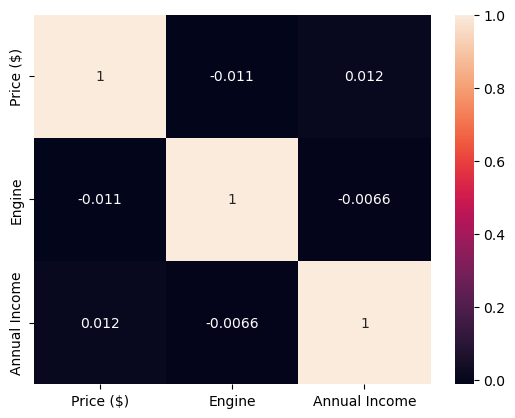

In [295]:
sns.heatmap(dff[['Price ($)', 'Engine', 'Annual Income']].corr(), annot=True)

## 15 :  How does the average car price vary across different car models and engine types?

In [299]:
dff.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [307]:
model_engine_price = dff.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()


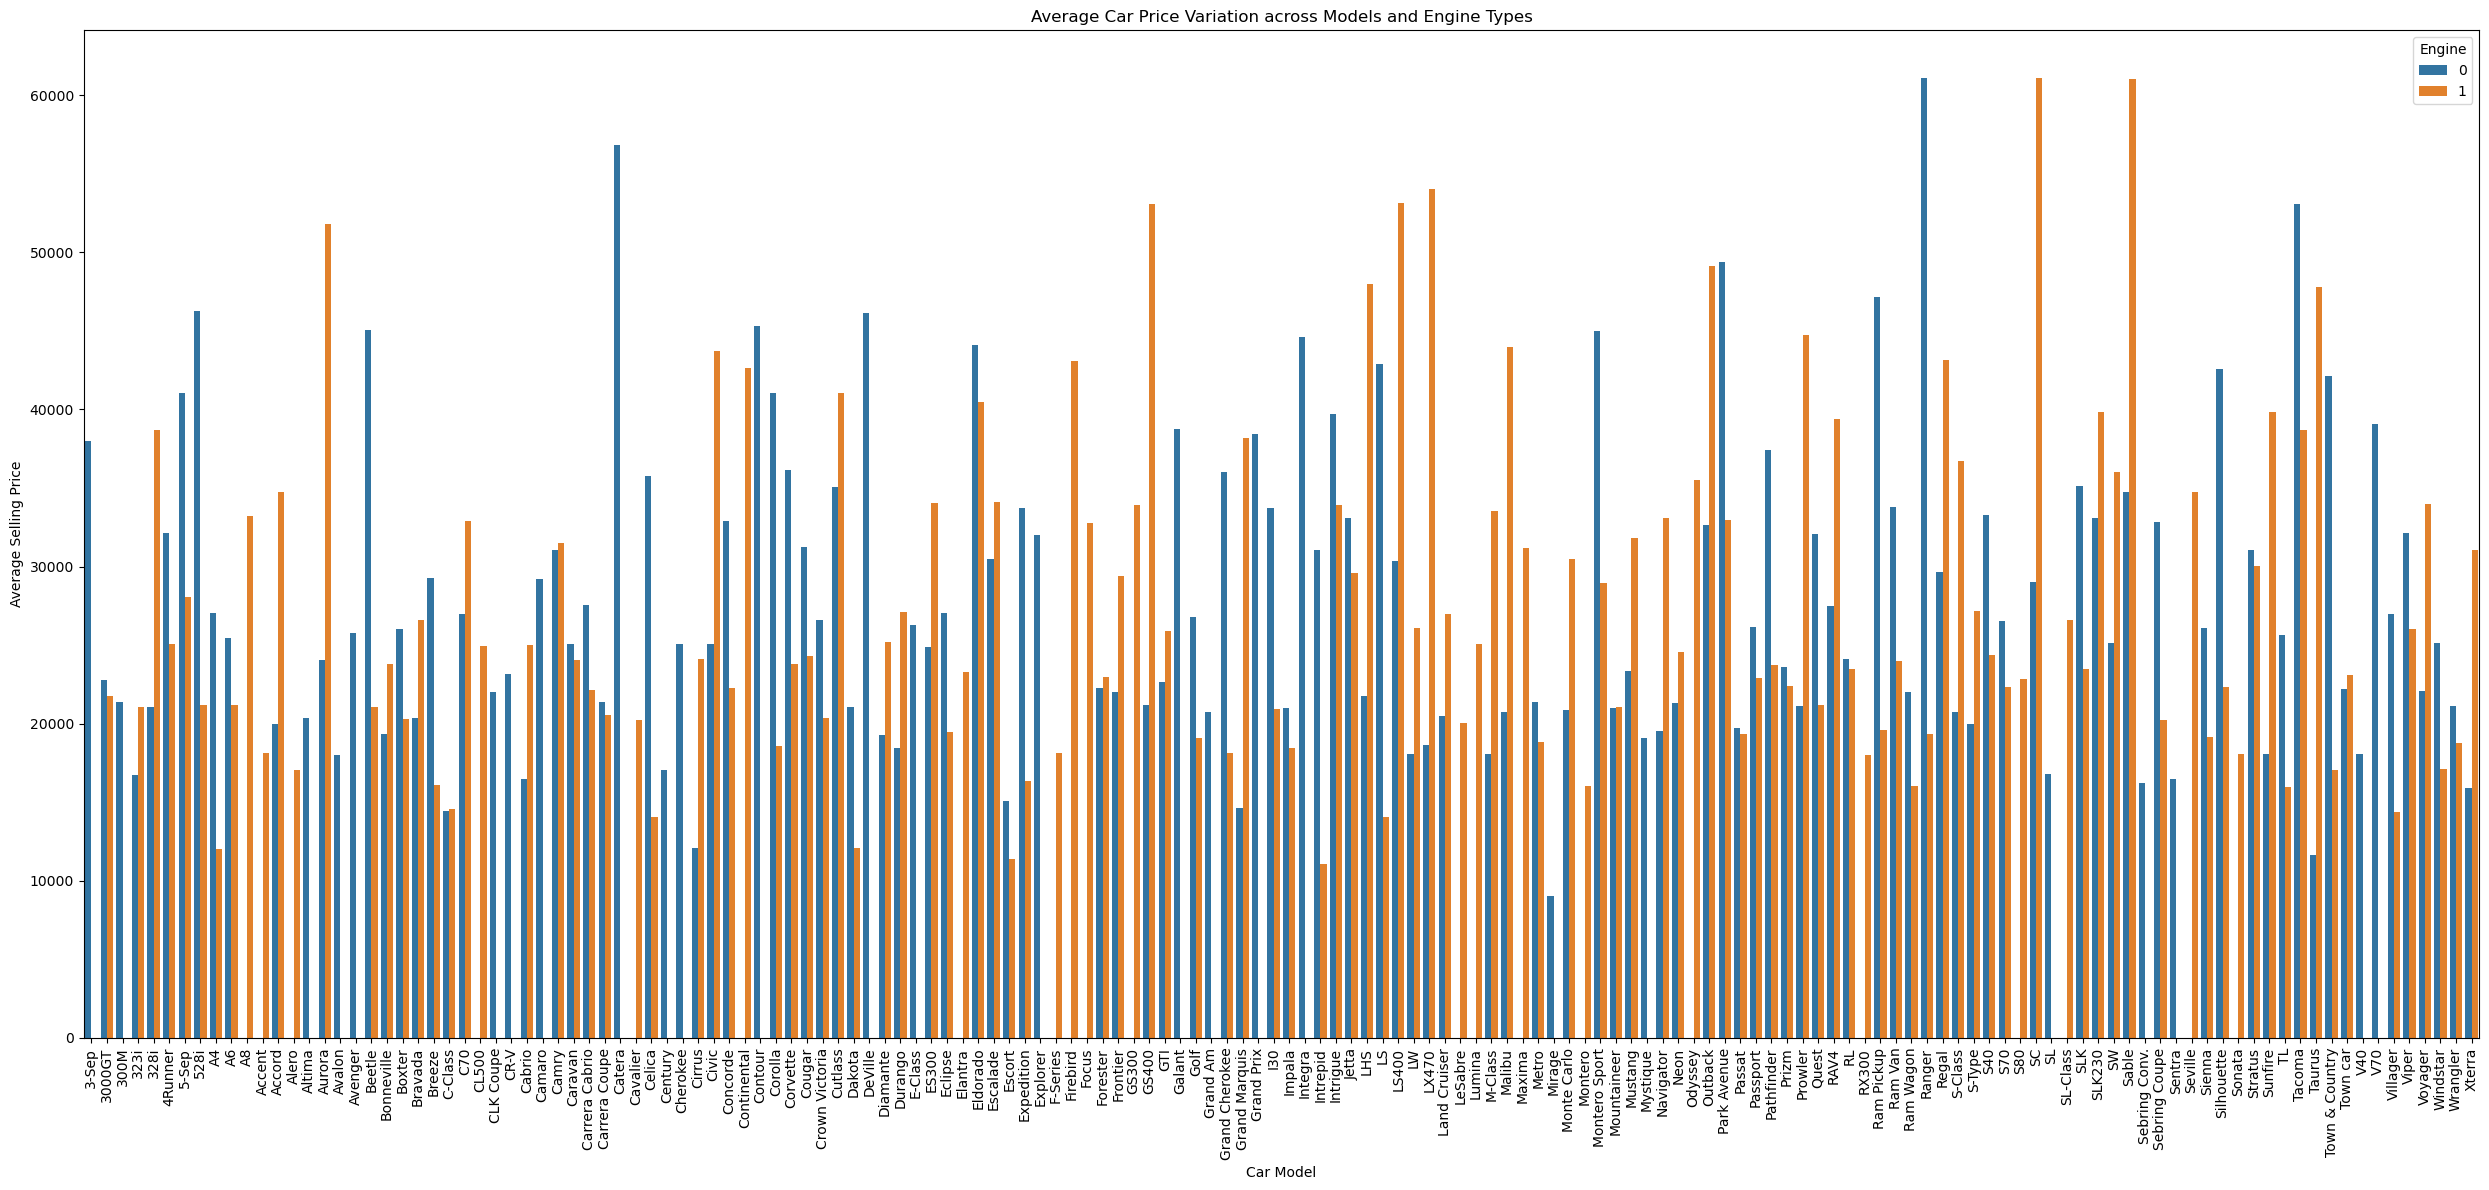

In [319]:
plt.figure(figsize=(25, 12))  # Adjust figure size as needed
sns.barplot(x='Model', y='Price ($)', hue='Engine', data=model_engine_price)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Average Car Price Variation across Models and Engine Types')
plt.xlabel('Car Model')
plt.ylabel('Average Selling Price')
plt.tight_layout()
plt.show()

# EDA - 3  Amazon Sales Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
d1 = pd.read_csv("amazon.csv")
d1

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [6]:
d1.shape

(1465, 16)

In [8]:
d1.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [10]:
d1.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [12]:
d1.dtypes

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object

In [14]:
d1.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [20]:
d1.describe(include="all").T

,count,unique,top,freq
product_id,1465,1351,B07JW9H4J1,3
product_name,1465,1337,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",5
category,1465,211,Computers&Accessories|Accessories&Peripherals|...,233
discounted_price,1465,550,₹199,53
actual_price,1465,449,₹999,120
discount_percentage,1465,92,50%,56
rating,1465,28,4.1,244
rating_count,1463,1143,"9,378",9
about_product,1465,1293,[CHARGE & SYNC FUNCTION]- This cable comes wit...,6
user_id,1465,1194,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...",10


In [22]:
d1.sample()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
615,B014SZO90Y,"Duracell Ultra Alkaline AA Battery, 8 Pcs",Electronics|GeneralPurposeBatteries&BatteryCha...,₹266,₹315,16%,4.5,"28,030",Lasts up to 100% longer* (*Longevity performan...,"AF37SWB5BJAXD6F2Q74M6HJIHADA,AFP7XI3X4GGJVQCYY...","Gopinathan,Punaram Chutia,Amazon Customer,SREE...","R31X4I2TGYDUN8,R27PTCIK04AE46,R23U630I51IZTI,R...","That's a nice one,Best services.,V good less p...","Nice one, tried on remote mouse and found work...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Duracell-Alkaline-Batter...


## Cleaning numeric columns

In [41]:
char_to_remove = ["₹", ",", "%"]
cols_to_remove = ["discounted_price", "actual_price","discount_percentage","rating_count"]

for char in char_to_remove:
    for col in cols_to_remove:
        d1[col] = d1[col].replace(char, "")

In [45]:
d1["discounted_price"]

0        399.0
1        199.0
2        199.0
3        329.0
4        154.0
         ...  
1460     379.0
1461    2280.0
1462    2219.0
1463    1399.0
1464    2863.0
Name: discounted_price, Length: 1465, dtype: float64

In [49]:
d1["actual_price"]

0       1099.0
1        349.0
2       1899.0
3        699.0
4        399.0
         ...  
1460     919.0
1461    3045.0
1462    3080.0
1463    1890.0
1464    3690.0
Name: actual_price, Length: 1465, dtype: float64

In [51]:
d1["discount_percentage"]

0       64
1       43
2       90
3       53
4       61
        ..
1460    59
1461    25
1462    28
1463    26
1464    22
Name: discount_percentage, Length: 1465, dtype: int64

In [47]:
d1.dtypes

product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage      int64
rating                  object
rating_count            object
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
dtype: object

In [61]:
def clean_numeric_column(column, remove_chars):
    return pd.to_numeric(d1[column].replace(remove_chars, '', regex=True), errors='coerce')

d1['rating_count'] = clean_numeric_column('rating_count', '[,]')


In [63]:
d1['rating_count']

0       24269.0
1       43994.0
2        7928.0
3       94363.0
4       16905.0
         ...   
1460     1090.0
1461     4118.0
1462      468.0
1463     8031.0
1464     6987.0
Name: rating_count, Length: 1465, dtype: float64

In [65]:
d1.dtypes

product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage      int64
rating                  object
rating_count           float64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
dtype: object

In [67]:
d1.sample()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
632,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/I/31VzNhhqif...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [85]:
d1[d1["rating"]=="|"]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,16,|,992.0,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


In [91]:
d1.drop(index=1279,inplace=True)

In [93]:
d1[d1["rating"]=="|"]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link


In [95]:
d1["rating"]=d1["rating"].astype(float)

In [97]:
d1.dtypes

product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage      int64
rating                 float64
rating_count           float64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
dtype: object

## handle missing values 

In [100]:
d1.rating.isnull().sum()

0

In [102]:
d1.rating_count.isnull().sum()

2

In [104]:

d1['rating_count'].fillna(d1['rating_count'].median(), inplace=True)

In [106]:
d1.rating_count.isnull().sum()

0

# Visualizations

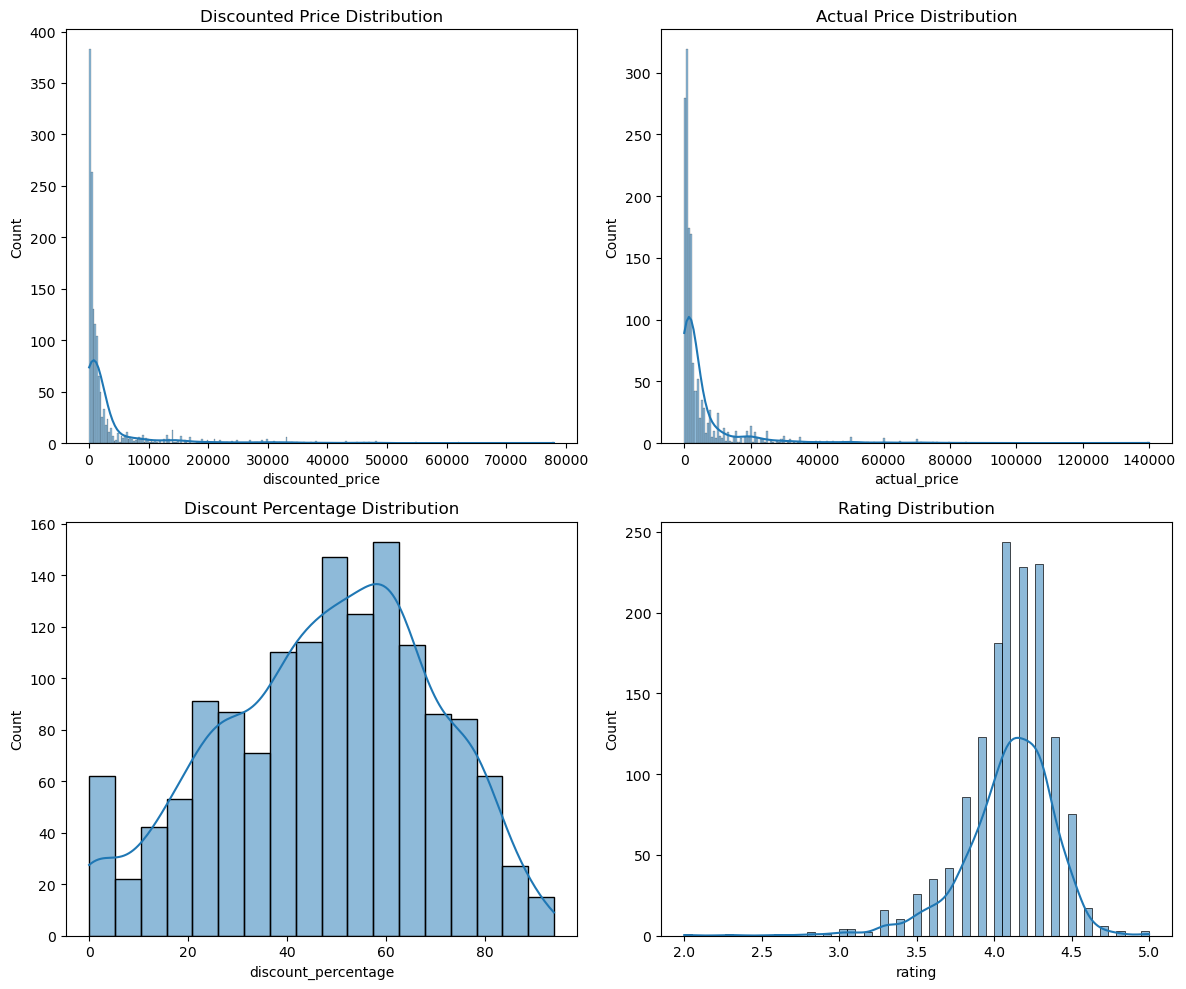

In [113]:

# Distributions of numeric columns
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(d1['discounted_price'], kde=True, ax=axes[0, 0]).set(title='Discounted Price Distribution')
sns.histplot(d1['actual_price'], kde=True, ax=axes[0, 1]).set(title='Actual Price Distribution')
sns.histplot(d1['discount_percentage'], kde=True, ax=axes[1, 0]).set(title='Discount Percentage Distribution')
sns.histplot(d1['rating'], kde=True, ax=axes[1, 1]).set(title='Rating Distribution')
plt.tight_layout()
plt.show()

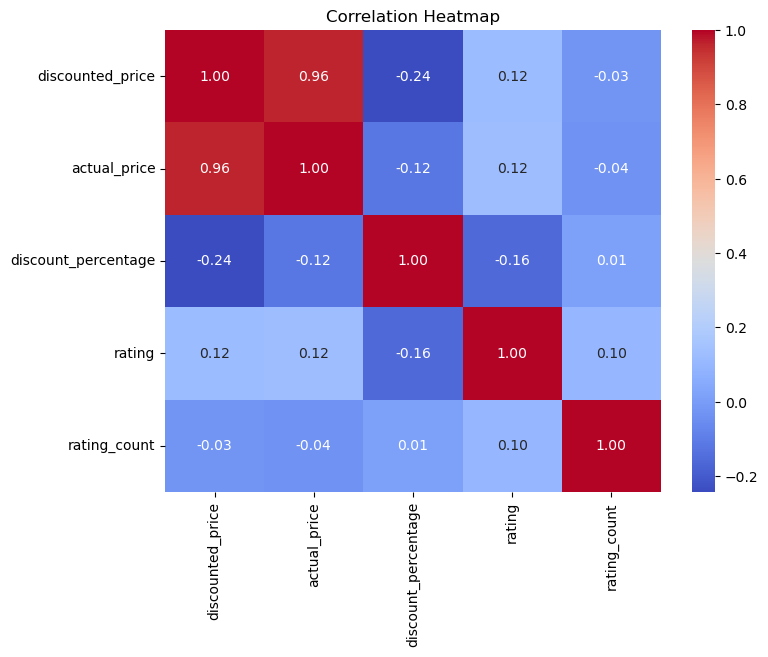

In [117]:
plt.figure(figsize=(8, 6))
sns.heatmap(d1[['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']].corr(), 
            annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# data encoding 

In [120]:
num_features = [feature for feature in d1.columns if d1[feature].dtype != 'O']

In [122]:
num_features

['discounted_price',
 'actual_price',
 'discount_percentage',
 'rating',
 'rating_count']

In [124]:
cat_features = [feature for feature in d1.columns if d1[feature].dtype == 'O']

In [126]:
cat_features

['product_id',
 'product_name',
 'category',
 'about_product',
 'user_id',
 'user_name',
 'review_id',
 'review_title',
 'review_content',
 'img_link',
 'product_link']

In [128]:
#scaling >> numerical features
#categorical >> Onehot encoding

In [168]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler #both are data transformation
from sklearn.compose import ColumnTransformer


In [170]:
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop = 'first')
preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', oh_transformer, cat_features),
        ('StandardScaler', numeric_transformer, num_features)
    ])

In [172]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 ['product_id', 'product_name', 'category',
                                  'about_product', 'user_id', 'user_name',
                                  'review_id', 'review_title', 'review_content',
                                  'img_link', 'product_link']),
                                ('StandardScaler', StandardScaler(),
                                 ['discounted_price', 'actual_price',
                                  'discount_percentage', 'rating',
                                  'rating_count'])])

In [174]:
d1.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [176]:
X = d1.drop(columns=['discounted_price'])
y = d1['discounted_price']




In [178]:
X

,product_id,product_name,category,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,1099.0,64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,349.0,43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,1899.0,90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,699.0,53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,399.0,61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,919.0,59,4.0,1090.0,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,3045.0,25,4.1,4118.0,"230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",https://m.media-amazon.com/images/I/41gzDxk4+k...,https://www.am

In [180]:
y

0        399.0
1        199.0
2        199.0
3        329.0
4        154.0
         ...  
1460     379.0
1461    2280.0
1462    2219.0
1463    1399.0
1464    2863.0
Name: discounted_price, Length: 1464, dtype: float64

In [182]:
from sklearn.model_selection import train_test_split

In [184]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train and Test Dataset Shapes:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

Train and Test Dataset Shapes:
X_train: (1171, 15), X_test: (293, 15), y_train: (1171,), y_test: (293,)


In [186]:
pd.DataFrame(X_train)

,product_id,product_name,category,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1331,B085LPT5F4,Solidaire 550-Watt Mixer Grinder with 3 Jars (...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,2800.0,41,3.9,2162.0,DRY GRINDING BLADE - This stainless steel blad...,"AHZFKWGDBRQKNMNQ4ZPL52OZBRKA,AGBEFVJFOQIRF7C7K...","Mukta Khan,mal kho,Apurba,Patel Kiran,Critical...","R2F6HAXHI2E0QM,R3ARFHUPI2UTDN,R2NFBRLIKTBYX6,R...",Ok product 900/ma bast product A little famil...,Ok product 900/ma bast product A little family...,https://m.media-amazon.com/images/I/41SWYTwG5-...,https://www.amazon.in/Solidaire-550-Watt-Mixer...
724,B003L62T7W,"Logitech B100 Wired USB Mouse, 3 yr Warranty, ...",Computers&Accessories|Accessories&Peripherals|...,375.0,26,4.3,31534.0,"A comfortable, ambidextrous shape feels good i...","AE6DY6YWTSSE3XNHDXZDGQM2JL2Q,AES3UPSNCD37JZLHZ...","Uday Joglekar,Simi Singh,Hi,chirag bansal,Swar...","R3U9FRV2Q625DO,R3EJZ83W9OHW3D,RSH53O0JL66NL,R3...","Handy Mouse,Good quality mouse,Good one.,Good,...","Liked this Product,https://m.media-amazon.com/...",https://m.media-amazon.com/images/I/31iFF1Kbkp...,https://www.amazon.in/Logitech-B100-Optical-Mo...
254,B07VVXJ2P5,SVM Products Unbreakable Set Top Box Stand wit...,"Electronics|HomeTheater,TV&Video|Accessories|T...",399.0,76,3.6,1796.0,"Material : Plastic Unbreakable, Colour : Black...","AECWBGFECHOEYECHQGPMWRYNKHYQ,AGIWNT5SLEHW7HVLB...","Samadhan patil,ARUN,govind,kishor Wankhade,Raw...","R27SWYIOUU9JGH,R3CV6G8SG8GVG0,R3FH44SD2VCUCM,R...","Good product,Average product quality,Good,Good...","Nice product,Okay product at Cheap price. But ...",https://m.media-amazon.com/images/I/41QvckgGiC...,https://www.amazon.in/SVM-Products-Premium-Qua...
1068,B07DGD4Z4C,"Butterfly Jet Elite Mixer Grinder, 750W, 4 Jar...",Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,5795.0,40,3.9,25340.0,"Wattage: 750 W; Voltage: 220-240V, 50-60Hz ; R...","AHFKBN3ZZECQJAP2WEVEDSPH67CQ,AGKAHQZZVWL46MMG7...","Lakshminarayana G,bhanu,shah,Pavan kumar G,Sai...","R1MX1ES6AZNSD8,R222NCQOR0GD05,RSLWFI693E1IC,RK...","Very nice product from Amazon,Work in very goo...","It's completely good product from Amazon,Best ...",https://m.media-amazon.com/images/I/41vK2c5b-l...,https://www.amazon.in/Butterfly-Jet-Elite-750-...
1193,B07FL3WRX5,Wonderchef Nutri-blend Complete Kitchen Machin...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,6500.0,49,3.7,11217.0,Performance with Style:India's favourite Mixer...,"AFDSTWW5X5LM7QSJ7TE2GDJEZHSA,AFIEOCOML7Z7XPPQY...","Priti jain,Burhanuddin Madraswala,Gazala Nawab...","RXAODV2OHBKW4,R2AV4UYNGRE33Q,R3KJCPWOGYC672,R2...","Compact and powerful but alot of plastic,Overa...",Firstly I got the cracked jar but the product ...,https://m.media-amazon.com/images/I/414eE-M+gf...,https://www.amazon.in/Wonderchef-Nutri-Blend-C...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,B0756K5DYZ,Prestige Iris 750 Watt Mixer Grinder with 3 St...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,6295.0,48,3.9,43070.0,Motor Warranty: 2; Product Warranty: 2;|Operat...,"AENY7MQ3WUVPIJ5I5GPDPMC3NKPA,AGUCURUVW2ZY4B5WL...","Prabhat,Chandrika,Pramesh969,Prity,Amit Kumar,...","R4FRMNYYMSIBC,R3L7S5SH36JCUJ,R1YN1N7YNW7AIJ,RF...","Juicer is not effective,Ok good,Products quali...","Juicer is not effective,Ok good,https://m.medi...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Prestige-Iris-Grinder-St...
1295,B07ZJND9B9,ACTIVA 1200 MM HIGH SPEED 390 RPM BEE APPROVED...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|C...",1990.0,45,3.9,5911.0,"Box Contains: Fan Motor, Blade Set, Canopy Set...","AFCLVEPUPFSZU5KJMDBYKGARGQBQ,AEC4ACDLYBYYFG247...","Ravi,Pasala Eswararao,Verified User,Azarudeen,...","R1SWHPJDUW2G3M,R2RFQJDQF5BT8,RPGTYXQGC3TXI,R3T...","Decently priced fan,Power saving fan low super...","A good fan. Very sad no regulator, and had to ...",https://m.media-ama

In [193]:
X_test

,product_id,product_name,category,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1297,B072NCN9M4,AMERICAN MICRONIC- Imported Wet & Dry Vacuum C...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",11850.0,25,4.2,3065.0,This Stainless Steel vacuum cleaner is an exce...,"AHX7I43IUBTBR5SMBWXO2VWLFLDA,AGUV5JDS7DN6OSZ2C...","A.sh,Jp,Junaid Yaseen,Maya sutar,Andrabi,prave...","R3TVMEHW7XIWSU,R20EKADK19NV0G,R3AGXOFMA1Z00Q,R...","Best in its price range,Best suction power,Dom...",Purchased from Amazon for full price under no ...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/American-Micronic-AMI-VC...
175,B09LHXNZLR,"Skadioo WiFi Adapter for pc | Car Accessories,...",Computers&Accessories|NetworkingDevices|Networ...,499.0,60,3.7,612.0,【Powerful compatibility】 Compatible with TV bo...,"AG2Q7FISK54KBSPHF7CNNGZ3GLNA,AFFYX3FR3SF4JOIN7...","POTNURU RAJINI,swapnil mohit masih,Suryansh Bh...","R3U57AW0L6O5C6,R3FCLH5G7XVDU4,R39PNKDT86WK5V,R...","Good,Very nice,Best quality,Not bad,Best WiFi ...","Good,Its working is very nice with pc. Easy to...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Skadioo-Accessories-Rece...
275,B09LV13JFB,LOHAYA Voice Assistant Remote Compatible for A...,"Electronics|HomeTheater,TV&Video|Accessories|R...",999.0,60,3.3,23.0,100% Best Quality Plastic Body and Soft Silico...,"AERUC72DWRPOM2EHX3YBTBPKYV7A,AHMH6RNLYI2G65HY7...","Amazon Customer,Amazon Customer,Akul,Akash Yad...","R1P2VLNHZAHSCU,R28B2GC0X0RMKW,RQ2S0N0NGDQVY,R1...",When I placed the order I was in doubt whether...,"Ok,Very disappointedRange is not good it doesn...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/LOHAYA-Assistant-Compati...
548,B08M66K48D,POPIO Tempered Glass Screen Protector Compatib...,Electronics|Mobiles&Accessories|MobileAccessor...,599.0,50,4.3,4674.0,Hardness: High hardness level provides protect...,"AHH26HAPTOI5Z52DFLNYU5TOLWCQ,AFIPAA4KT36MSZTCV...","Ram K,Ankush,Viswanathan,Sanchita Mandal,Malho...","R2K2YNHJ952H5J,R1I8HU4RYFCVYW,R2DH2MLDOFTD73,R...","Big Bubble dont go away,Perfect tempered glass...",Used guiding stickers but in those places bubb...,https://m.media-amazon.com/images/I/411fc62wnp...,https://www.amazon.in/POPIO-Tempered-Protector...
1000,B0B2DJDCPX,SWAPKART Fast Charging Cable and Data Sync USB...,Computers&Accessories|Accessories&Peripherals|...,499.0,58,3.9,536.0,[High Compatibility] : This iphone data cable ...,"AEBHZQJ4R2TZ57GOCSTMIP53F4JQ,AHSESHUAGEFQ62M3K...","Vinay,Amazon Customer,Naveenkumar Vemula,sumit...","R2LX1M52C4KNJA,R2BXIXVBJUUUEC,R19EYLO6N0AKLG,R...","Value for money,Nice product,timely delivered ...",Packing is good .. they have sent a box for it...,https://m.media-amazon.com/images/I/41KmCJuybR...,https://www.amazon.in/SWAPKART-Charging-Compat...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,B0B9JZW1SQ,"4 in 1 Handheld Electric Vegetable Cutter Set,...",Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,1200.0,59,3.2,113.0,{ 4 in 1 multi-function Electric Vegetable Cut...,"AFCTMQKPVJI6Y2JPIGDKRKIAV43A,AF6XUHN32GSFA7LFG...","Ashish,Kavita J.,Sundar,Tessy S.,saurabh manro...","R3N2A5DV7IPG6R,RXX6FP17PFNBS,R1JENN8Y0UV8G,RXP...","Cutter speed and power is very low,Nt happy wi...",",It's nt wrkng evn aftr 4 hours of charging,Th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Handheld-Electric-Vegeta...
481,B0B4F1YC3J,"Samsung Galaxy M13 5G (Aqua Green, 6GB, 128GB ...",Electronics|Mobiles&Accessories|Smartphones&Ba...,19499.0,28,4.1,18998.0,Upto 12GB RAM with RAM Plus | 128GB internal m...,"AGAELRYPMTG5SADZPDYB343EASAA,AGFN4JODOM2NTFCJQ...","Satheesh Kadiam,Pritom Chakraborty,Vishwa,Simr...","R2K5OD0MEEBTDL,RS1N6TNO33BOK,R6KWBGOKI1N9Y,R30...","Phone, camera, heating - works for me, may not...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/

# EDA - 4 Spotify Data: Popular Hip-hop Artists and Tracks

## 1 :  Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful?


In [196]:
df1 = pd.read_csv("spotify.csv")
df1

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [198]:
df1.shape

(440, 5)

In [200]:
df1.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

In [202]:
df1.isnull().sum()

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

In [214]:
df1.duplicated().sum()

27

In [216]:
df1.drop_duplicates(inplace=True)

In [218]:
df1.duplicated().sum()

0

In [220]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 413 entries, 0 to 438
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         413 non-null    object
 1   Track Name     413 non-null    object
 2   Popularity     413 non-null    int64 
 3   Duration (ms)  413 non-null    int64 
 4   Track ID       413 non-null    object
dtypes: int64(2), object(3)
memory usage: 19.4+ KB


In [228]:
num_features = [feature for feature in df1.columns if df1[feature].dtype != 'O']

In [230]:
num_features

['Popularity', 'Duration (ms)']

In [232]:
cat_features = [feature for feature in df1.columns if df1[feature].dtype == 'O']

In [234]:
cat_features

['Artist', 'Track Name', 'Track ID']

In [236]:
for col in cat_features:
    print(f"{col} has {df1[col].unique()} values \n")

Artist has ['Drake' 'Travis Scott' 'Post Malone' 'Noah Kahan' 'Nicki Minaj'
 'Justin Bieber' 'Jessie J' 'KAROL G' '21 Savage' 'Metro Boomin' 'SZA'
 'Jack Harlow' 'Jung Kook' 'Lil Nas X' 'Lyrical Lemonade' 'Future'
 'Don Toliver' 'Lil Wayne' 'Yeat' 'Eminem' 'Kendrick Lamar' 'Baby Keem'
 'The Weeknd' 'JAY-Z' 'Cardi B' 'Bruno Mars' 'Ed Sheeran' 'GloRilla'
 'Gunna' 'Lil Baby' 'Internet Money' 'Sarz' 'J. Cole' 'Lil Durk' 'cassö'
 'D-Block Europe' 'Clavish' 'Latto' 'Young Nudy' 'Megan Thee Stallion'
 'NEIKED' 'Snoop Dogg' 'Dr. Dre' 'benny blanco' 'Young Thug' 'Chris Brown'
 'Dave' 'Central Cee' 'The Kid LAROI' 'Quevedo' 'Bizarrap' 'Anuel AA'
 'SAIKO' 'David Guetta' 'Coi Leray' 'Pressa' 'Fivio Foreign' 'RAYE'
 'French Montana' 'Arizona Zervas' 'Pharrell Williams' 'XXXTENTACION'
 'Kane Brown' 'Ellie Goulding' 'Reneé Rapp' 'Maroon 5' 'DJ Snake' 'Quavo'
 'DJ Khaled' 'ATL Jacob' 'Jason Derulo' 'Kanye West' 'Trueno'
 'Rauw Alejandro' 'Dua Lipa' 'DaBaby' 'Quality Control' 'That Mexican OT'
 '¥$' 'N

## 2 : What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram


In [240]:
df1.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

In [248]:
df1['Popularity'].describe()

count    413.000000
mean      75.384988
std        9.789010
min       29.000000
25%       70.000000
50%       76.000000
75%       82.000000
max       97.000000
Name: Popularity, dtype: float64

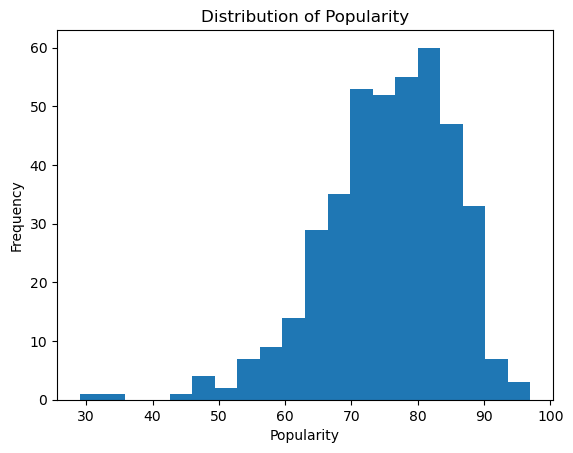

In [250]:


plt.hist(df1['Popularity'], bins=20)  # Adjust 'bins' for desired granularity
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Distribution of Popularity')
plt.show()

## 3 : Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot?

In [253]:
df1.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

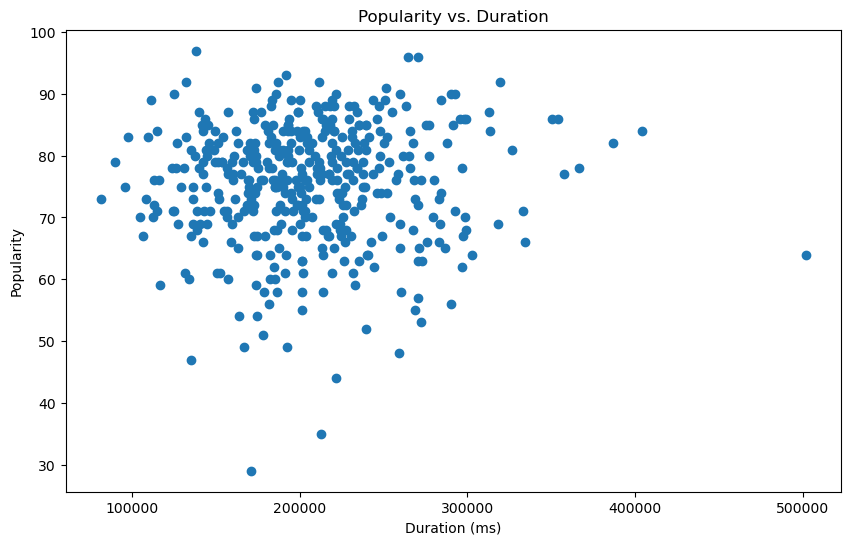

In [255]:
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.scatter(df1['Duration (ms)'], df1['Popularity'])
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.title('Popularity vs. Duration')
plt.show()

## 4 : Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot?

In [260]:
df1.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

In [262]:
artist_counts = df1['Artist'].value_counts()

In [264]:
artist_counts

Artist
Drake             17
Eminem            11
Flo Rida          10
Ludacris          10
Timbaland         10
                  ..
Arizona Zervas     1
Fivio Foreign      1
Pressa             1
David Guetta       1
Diddy              1
Name: count, Length: 115, dtype: int64

In [266]:
top_artist = artist_counts.index[0]
top_artist_count = artist_counts.iloc[0]

print(f"The artist with the highest number of tracks is: {top_artist} with {top_artist_count} tracks.")

The artist with the highest number of tracks is: Drake with 17 tracks.


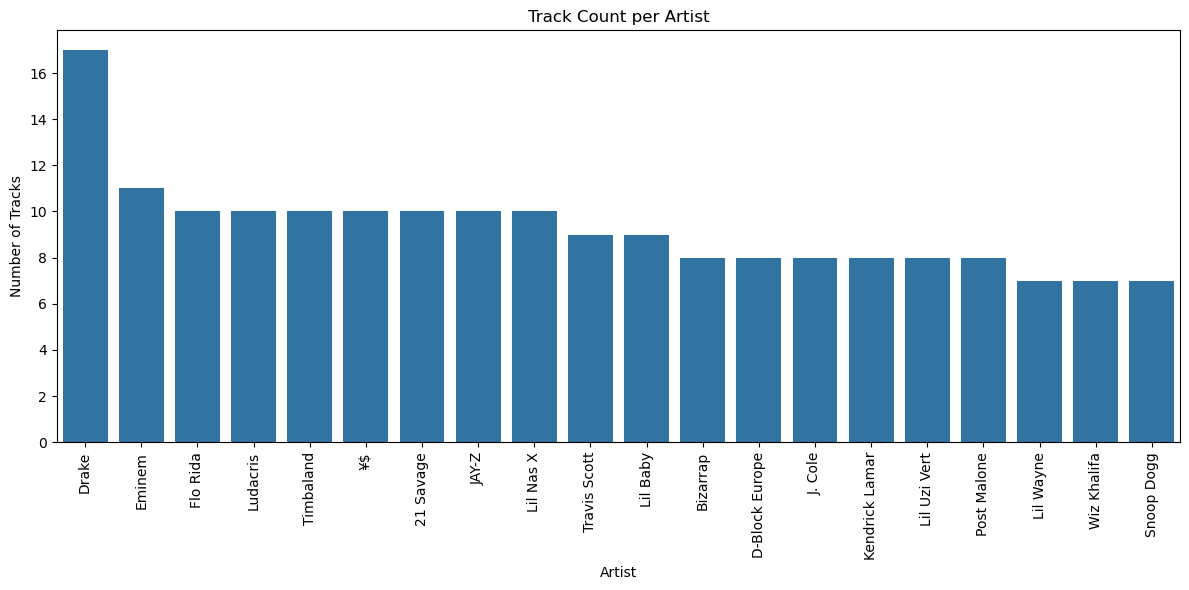

In [268]:
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.countplot(x='Artist', data=df1, order=artist_counts.index[:20])  # Show top 20 artists
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Artist')
plt.ylabel('Number of Tracks')
plt.title('Track Count per Artist')
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

## 5 : What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each?

In [275]:
df1.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

In [279]:

least_popular_tracks = df1.sort_values(by='Popularity', ascending=True).head(5)

# Display artist name and track name
for index, row in least_popular_tracks.iterrows():
    print(f"Artist: {row['Artist']}, Track: {row['Track Name']}, Popularity: {row['Popularity']}")

Artist: Pressa, Track: Attachments (feat. Coi Leray), Popularity: 29
Artist: Justin Bieber, Track: Intentions, Popularity: 35
Artist: French Montana, Track: Splash Brothers, Popularity: 44
Artist: Lil Baby, Track: On Me - Remix, Popularity: 47
Artist: Wyclef Jean, Track: 911 (feat. Mary J. Blige), Popularity: 48


## 6 : Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist?

In [282]:

top_5_artists = df1['Artist'].value_counts().head(5).index.tolist()

# Calculate average popularity for each artist
average_popularity = df1[df1['Artist'].isin(top_5_artists)].groupby('Artist')['Popularity'].mean()

# Display the average popularity for each artist
print("Average Popularity for Top 5 Artists:")
print(average_popularity)

# Find the artist with the highest average popularity
highest_avg_popularity_artist = average_popularity.idxmax()
highest_avg_popularity = average_popularity.max()

print(f"\nThe artist with the highest average popularity is: {highest_avg_popularity_artist} with an average popularity of {highest_avg_popularity:.2f}")

Average Popularity for Top 5 Artists:
Artist
Drake        82.882353
Eminem       83.636364
Flo Rida     78.000000
Ludacris     63.000000
Timbaland    69.000000
Name: Popularity, dtype: float64

The artist with the highest average popularity is: Eminem with an average popularity of 83.64


## 7 : For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist?


In [285]:

top_5_artists = df1['Artist'].value_counts().head(5).index.tolist()

# Filter DataFrame to include only tracks by the top 5 artists
filtered_df = df1[df1['Artist'].isin(top_5_artists)]

# Group by artist and get the track with the highest popularity
most_popular_tracks = filtered_df.loc[filtered_df.groupby('Artist')['Popularity'].idxmax()]

# Display the most popular track for each artist
print("Most Popular Tracks for Top 5 Artists:")
for index, row in most_popular_tracks.iterrows():
    print(f"Artist: {row['Artist']}, Track: {row['Track Name']}, Popularity: {row['Popularity']}")

Most Popular Tracks for Top 5 Artists:
Artist: Drake, Track: Rich Baby Daddy (feat. Sexyy Red & SZA), Popularity: 92
Artist: Eminem, Track: Without Me, Popularity: 90
Artist: Flo Rida, Track: Low (feat. T-Pain), Popularity: 84
Artist: Ludacris, Track: My Chick Bad, Popularity: 67
Artist: Timbaland, Track: The Way I Are, Popularity: 85


## 8 : Visualize relationships between multiple numerical variables simultaneously using a pair plot?


In [288]:
cat_features

['Artist', 'Track Name', 'Track ID']

In [290]:
num_features

['Popularity', 'Duration (ms)']

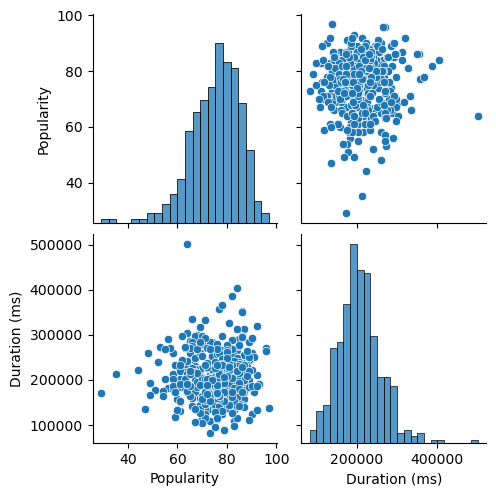

In [292]:

sns.pairplot(df1[num_features])
plt.show()

## 9 : Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot?


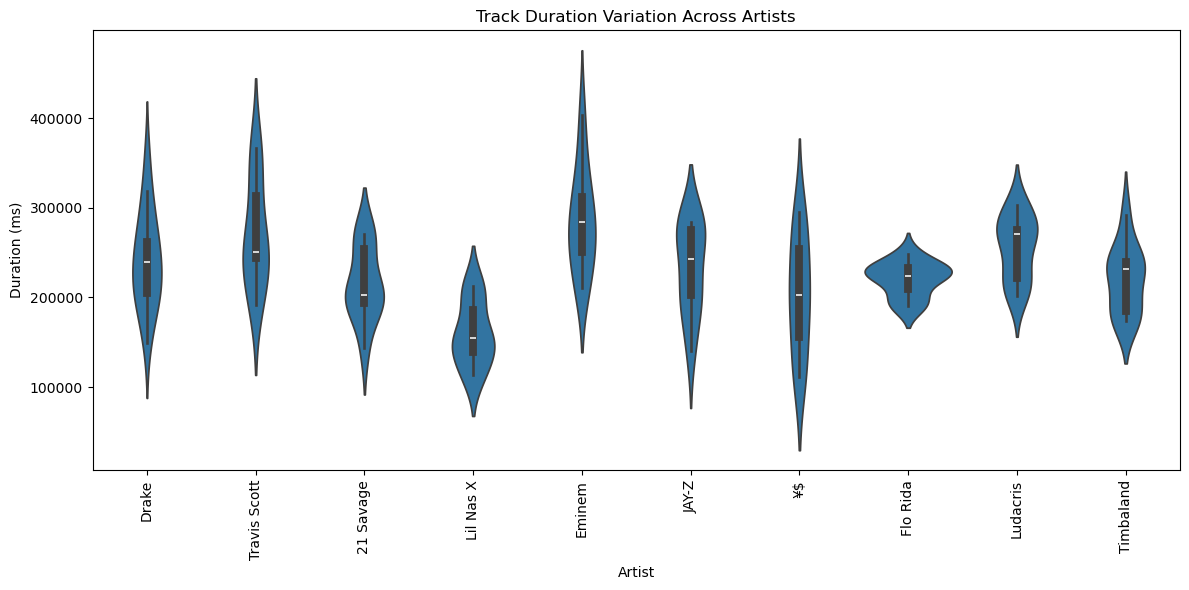

In [295]:

# Select the top 10 artists for better visualization
top_10_artists = df1['Artist'].value_counts().head(10).index.tolist()
filtered_df = df1[df1['Artist'].isin(top_10_artists)]

# Create the violin plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.violinplot(x='Artist', y='Duration (ms)', data=filtered_df)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.title('Track Duration Variation Across Artists')
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

## 10 : How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

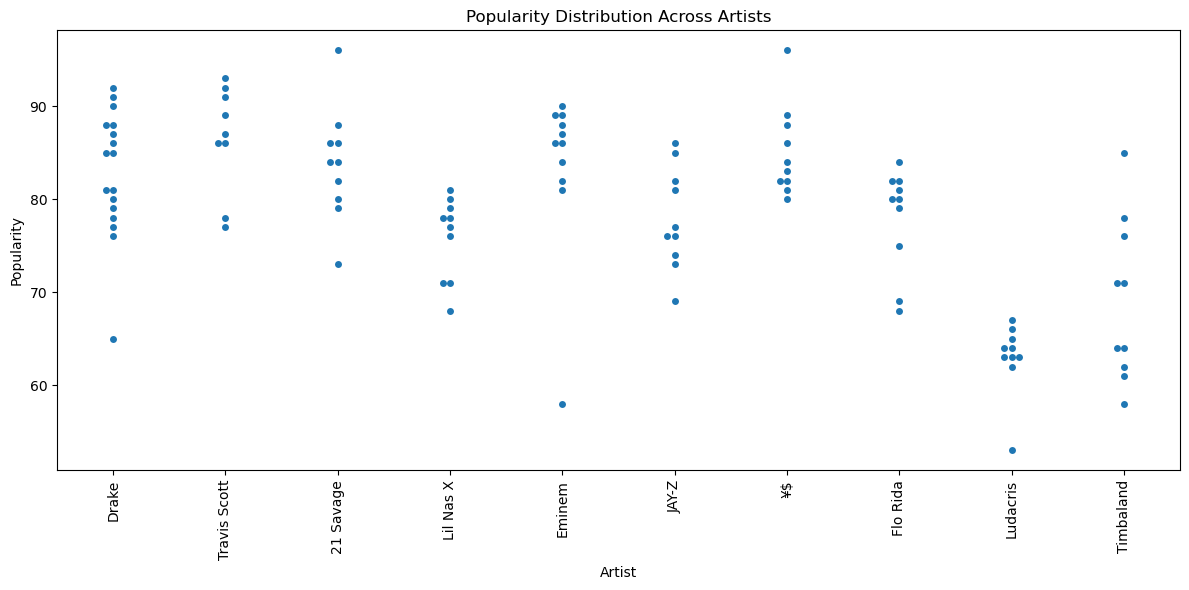

In [298]:

top_10_artists = df1['Artist'].value_counts().head(10).index.tolist()
filtered_df = df1[df1['Artist'].isin(top_10_artists)]

# Create the violin plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.swarmplot(x='Artist', y='Popularity', data=filtered_df)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.title('Popularity Distribution Across Artists')
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()